# MACHINE LEARNING GROUP PROJECT 

### Group Members: Helena Krumm (55577),Marouan Kamoun (53833), Mila Gardini (54742), Monica Navas (54577), Yassine Hafi (54466) 

## **Index**
* [Import libraries](#libraries)
* [Importing and Reading Data](#data)
* [Exploratory Data Analysis](#eda)
* [Model 1 : Decision Tree ](#model1)
* [Model 2: Clustering](#cluster)

## Sources

Original Owners of Database: 

Remote Sensing and GIS Program 

Department of Forest Sciences

College of Natural Resources

Colorado State University 

Fort Collins, CO 80523 

(contact Jock A. Blackard, jblackard@fs.fed.us or Dr. Denis J. Dean, denis.dean@utdallas.edu) 

## Overview

The cover type is the plant growth characteristic of an area. Forests are one of the most critical ecosystems on our planet, and they provide a range of benefits to both people and the environment. However, forests around the world are facing numerous threats, including deforestation, invasive species, and climate change impacts. To address these issues, we need a better understanding of the state of the forest ecosystem and the factors that influence forest health. This is where environmental monitoring comes in.

Our are of interest is Colorado, US, and we aim to provide an academica research that will serve as environmental monitoring, which is a critical aspect of sustainable forest management, as it allows us to understand the state of a forest ecosystem and identify potential threats to its health. By analyzing the cartographic variables and forest cover type data in this project, we gain insights into the relationship between different environmental factors and forest health. 

The "Covertype" dataset contains information about forest cover types, which can be used to inform various **environmental monitoring and management applications.** The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. 

Our scientific research aims to lay the foundation to serve as a benchmark for managerial choices in forest management. Using machine learning models, we can analyze changes in forest cover over time and identify areas that are undergoing rapid change or that are particularly vulnerable to environmental threats. 


## Business Application

Our environmental monitoring services can ideally benefit a range of clients, but since the area under study, is not affected by woodland exploitation, this research is directed to the government for the purpose of better management and planning over time. 
This area has great potential, and our research can be combined in the future with research on local wildlife and animal movement, so that the Colorado state government can properly document and administer the forested space (what plants prevent others from growing, whether there is the presence of particularly flammable shrubs and where, cleaning the understory in order to prevent fires).




including **government agencies, conservation organizations, and private businesses.** 
Some examples are Western Forest Products and Aspen Wood Products. Both companies are leading paper and wood buyers and sellers in the State of Colorado. The first a major producer of lumber and paper products in Colorado and the surrounding region. By using environmental monitoring services, Western Forest Products could optimize their forest management practices to ensure long-term sustainability and minimize the risk of environmental damage.
While Aspen Wood Products is a leading manufacturer of furniture and cabinetry made from sustainably harvested wood. By using environmental monitoring services, Aspen Wood Products could ensure that their wood sources are being managed in an environmentally responsible manner and provide assurance to customers that their products are sustainably produced.

Overall, any company in the paper and wood/furniture industries that relies on forest resources could potentially benefit from environmental monitoring services based on the Covertype dataset.
With this research we could help governments make more informed and sustainable decisions about forest management, wildfire prevention, conservation planning, and climate change adaptation. By selling this research, our clients can benefit from the latest scientific insights and tools to protect our natural resources and ensure their long-term sustainability. 

## Dataset informations

Number of instances (observations):  581,012

Number of Attributes:	12 measures, but 54 columns of data(10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables)


1.	Attribute information:

Given is the attribute name, attribute type, the measurement unit and a brief description.  The forest cover type is the classification problem. 

    Name                                     Data Type    Measurement                       Description

    Elevation                               quantitative    meters                       Elevation in meters
    Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
    Slope                                   quantitative    degrees                      Slope in degrees
    Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
    Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
    Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
    Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
    Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
    Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
    Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
    Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
    Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
    Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation


Code Designations:

    Wilderness Areas:  	1 -- Rawah Wilderness Area
                        2 -- Neota Wilderness Area
                        3 -- Comanche Peak Wilderness Area
                        4 -- Cache la Poudre Wilderness Area

Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:


      Forest Cover Type Classes:	1 -- Spruce/Fir
                                    2 -- Lodgepole Pine
                                    3 -- Ponderosa Pine
                                    4 -- Cottonwood/Willow
                                    5 -- Aspen
                                    6 -- Douglas-fir
                                    7 -- Krummholz


2.  Basic Summary Statistics for quantitative variables only
	(whole dataset -- thanks to Phil Rennert for the summary values):

            Name                                    Units             Mean   Std Dev
            Elevation                               meters          2959.36  279.98
            Aspect                                  azimuth          155.65  111.91
            Slope                                   degrees           14.10    7.49
            Horizontal_Distance_To_Hydrology        meters           269.43  212.55
            Vertical_Distance_To_Hydrology          meters            46.42   58.30
            Horizontal_Distance_To_Roadways         meters          2350.15 1559.25
            Hillshade_9am                           0 to 255 index   212.15   26.77
            Hillshade_Noon                          0 to 255 index   223.32   19.77
            Hillshade_3pm                           0 to 255 index   142.53   38.27
            Horizontal_Distance_To_Fire_Points      meters          1980.29 1324.19


3.	Missing Attribute Values:  None.


4.	Class distribution:

           Number of records of Spruce-Fir:                211840 
           Number of records of Lodgepole Pine:            283301 
           Number of records of Ponderosa Pine:             35754 
           Number of records of Cottonwood/Willow:           2747
           Number of records of Aspen:                       9493 
           Number of records of Douglas-fir:                17367 
           Number of records of Krummholz:                  20510  
           Number of records of other:                          0  


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data analysis process that aims to summarize, visualize, and understand the underlying structure and patterns in a dataset. This helps in identifying trends, anomalies, and potential relationships among variables, which can ultimately lead to the development of appropriate statistical models and hypothesis testing.

In the given project, the goal is to predict forest cover types based on cartographic variables, with data derived from the US Forest Service (USFS) and the US Geological Survey (USGS). 

To perform the EDA, the team started by defining column names and generating names for binary columns based on their position. These binary column names were then appended to the list of column names, along with the target variable (cover type). After renaming the columns in the dataframe, the team proceeded to analyze the numerical columns by printing summary statistics. This helped to gain a better understanding of the central tendencies and dispersion within the data.

To further explore the distribution of the target variable, we printed the count of each target value and created a histogram. This provided insights into the frequency of different forest cover types and highlighted potential imbalances in the dataset. By examining the dataset in this manner, our group was able to identify trends, patterns, and potential relationships among variables, which will help in selecting appropriate techniques for modeling and prediction in the next stages of the project.

## Modeling approach

In order to predict forest cover types based on cartographic variables, our team has selected three machine learning models, which are well-suited to this dataset: classification, decision tree, and clustering.

Decision Tree: Decision trees are an ideal choice for our dataset because they can handle both numerical and categorical features, like the binary columns for wilderness areas and soil types. These models are easily interpretable and can capture non-linear relationships between features and the target variable. Moreover, they are capable of selecting the most relevant features for prediction, which can help improve overall model performance.

Clustering: Although clustering models are typically used for unsupervised learning, they can be adapted to predict forest cover types by applying a semi-supervised approach. This involves using clustering algorithms, such as k-means or hierarchical clustering, to group similar data points in the feature space. Once clusters are formed, we can assign the majority class of each cluster as its representative forest cover type. This method can be particularly useful when the dataset exhibits clear patterns or groups that correspond to different cover types.

Classification: We chose a classification model because our problem is a multiclass classification task, where the goal is to predict one of several possible forest cover types. Classification models, such as logistic regression, support vector machines (SVM), and k-nearest neighbors (KNN), can effectively predict categorical outcomes by learning patterns in the dataset and drawing decision boundaries between different classes.

By employing these three machine learning models, we aim to harness their unique strengths and capabilities in order to accurately predict forest cover types for our dataset. Through rigorous model evaluation and comparison, we will select the best-performing model that achieves the highest prediction accuracy and generalization performance.

<a name="libraries"></a>
## Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a name="data"></a>
## Loading Dataset

In [16]:
df=pd.read_csv("./dataset/covtype.data")

## Data Cleaning

In [17]:
# Define column names
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology ',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points']

# Generate names for binary columns based on their position
binary_col_names = [i+1 for i in range(4)]
binary_col_names += [i+1 for i in range(40)]

# Append the binary column names to the list of column names
col_names += binary_col_names

# Append the target variable name to the list of column names
col_names.append('Cover_Type_code')

# Rename the columns in the DataFrame
df.columns = col_names
# Print the first few rows of the DataFrame
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [20]:
#Grouping the soil type columns into 1 column
df['Soil type code'] = df.iloc[:, 14:54].idxmax(axis=1)
df = pd.concat([df.iloc[:, :14], df.iloc[:, 54:]], axis=1)
#Grouping the Wilderness Areas columns into 1 column
df['Wilderness area code'] = df.iloc[:, 10:14].idxmax(axis=1)
df = pd.concat([df.iloc[:, :10], df.iloc[:, 14:]], axis=1)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type_code,Soil type code,Wilderness area code
0,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
1,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
2,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
3,2595,45,2,153,-1,391,220,234,150,6172,5,29,1
4,2579,132,6,300,-15,67,230,237,140,6031,2,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,3,2,3
581007,2391,152,19,67,12,95,240,237,119,845,3,2,3
581008,2386,159,17,60,7,90,236,241,130,854,3,2,3
581009,2384,170,15,60,5,90,230,245,143,864,3,2,3


In [21]:
df1=df.copy()
#add a column with the description of codes for Soil type and wilderness areas
Wilderness_areas_list=['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area' ,'Cache la Poudre Wilderness Area']
df1['Wilderness area description']=[Wilderness_areas_list[col-1] for col in df1['Wilderness area code']]

list_of_soil_type=pd.read_csv("./dataset/list_of_soil_types.csv")
list_of_soil_type=list(list_of_soil_type)
df1['soil type description']=[list_of_soil_type[col-1] for col in df1['Soil type code']]

new_order = [col for col in df1.columns if col != 'Cover_Type_code'] + ['Cover_Type_code']
df1 = df1[new_order]

cover_type_list=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
df1['cover type description']=[cover_type_list[col-1] for col in df1['Cover_Type_code']]
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil type code,Wilderness area code,Wilderness area description,soil type description,Cover_Type_code,cover type description
0,2590,56,2,212,-6,390,220,235,151,6225,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
1,2804,139,9,268,65,3180,234,238,135,6121,12,1,Rawah Wilderness Area,"Legault family - Rock land complex, stony.",2,Lodgepole Pine
2,2785,155,18,242,118,3090,238,238,122,6211,30,1,Rawah Wilderness Area,Como family - Rock land - Legault family compl...,2,Lodgepole Pine
3,2595,45,2,153,-1,391,220,234,150,6172,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
4,2579,132,6,300,-15,67,230,237,140,6031,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",2,Lodgepole Pine


<a name="eda"></a>
## Exploratory Data Analysis

In [67]:
# Print the summary statistics of the numerical columns
df1.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil type code,Wilderness area code,Cover_Type_code
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,24.362435,2.114464,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,9.485412,1.061295,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,20.000000,1.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,29.000000,2.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,31.000000,3.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,40.000000,4.000000,7.000000


The count, mean, min, and max rows are self-explanatory. The std
row shows the standard deviation (which measures how dispersed the values are).
The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates
the value below which a given percentage of observations in a group of observations
falls.

Another quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). You can
either plot this one attribute at a time, or you can call the hist() method on the
whole dataset, and it will plot a histogram for each numerical attribute.

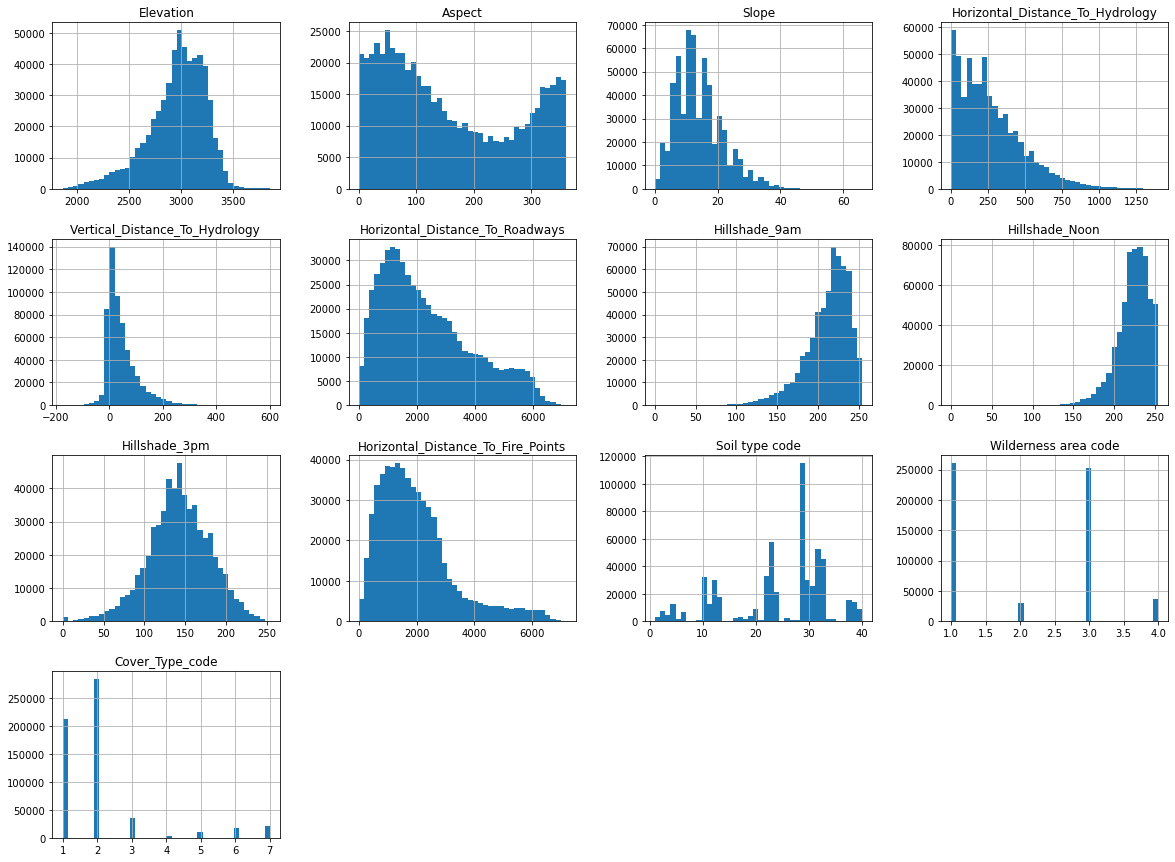

In [69]:
df1.hist(bins=40, figsize=(20,15))
plt.show()

The histogram plot shows the distribution of all the numeric columns in the dataset. 

- The "Elevation" column seems to be roughly normally distributed, with the majority of values falling in the range of 2500-3300. 

- The "Aspect" column appears to have a roughly uniform distribution, with no clear trend or peak in the data.

- The "Slope" column has a right-skewed distribution, indicating that the majority of slopes are relatively gentle, with a long tail of steeper slopes.

- The "Horizontal_Distance_To_Hydrology" and "Vertical_Distance_To_Hydrology" columns both have a strong peak at 0, indicating that many of the observations have no distance to hydrology.

- The "Horizontal_Distance_To_Roadways" column is roughly normally distributed, with a peak around 0-500.

- The "Hillshade" columns (9am, Noon, and 3pm) are all roughly normally distributed, with peaks around 200-255.

- The "Horizontal_Distance_To_Fire_Points" column is right-skewed, indicating that the majority of observations have relatively short distances to fire points.


Now we divide the data to train and test sets to explore the train set only.

In [72]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)
train = train_set.copy()

In [74]:
corr_matrix = train.corr()
corr_matrix

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil type code,Wilderness area code,Cover_Type_code
Elevation,1.000000,0.016514,-0.243424,0.305393,0.092062,0.365637,0.112343,0.206576,0.059700,0.147743,0.689688,-0.315614,-0.268716
Aspect,0.016514,1.000000,0.078070,0.017432,0.070243,0.025402,-0.578757,0.336020,0.646801,-0.107759,0.007680,0.138176,0.016621
Slope,-0.243424,0.078070,1.000000,-0.010450,0.275348,-0.216400,-0.327024,-0.528249,-0.176983,-0.185892,-0.105275,0.286982,0.149232
Horizontal_Distance_To_Hydrology,0.305393,0.017432,-0.010450,1.000000,0.605444,0.072132,-0.027187,0.047574,0.052748,0.051793,0.194134,0.056047,-0.020585
Vertical_Distance_To_Hydrology,0.092062,0.070243,0.275348,0.605444,1.000000,-0.047233,-0.166351,-0.110665,0.034914,-0.070503,0.070937,0.189172,0.081706
Horizontal_Distance_To_Roadways,0.365637,0.025402,-0.216400,0.072132,-0.047233,1.000000,0.034945,0.189715,0.105999,0.331230,0.240504,-0.446084,-0.152799
Hillshade_9am,0.112343,-0.578757,-0.327024,-0.027187,-0.166351,0.034945,1.000000,0.011146,-0.779769,0.132243,0.040163,-0.233395,-0.035737
Hillshade_Noon,0.206576,0.336020,-0.528249,0.047574,-0.110665,0.189715,0.011146,1.000000,0.594187,0.058238,0.013856,-0.081969,-0.096688
Hillshade_3pm,0.059700,0.646801,-0.176983,0.052748,0.034914,0.105999,-0.779769,0.594187,1.000000,-0.047078,-0.000417,0.104196,-0.048396
Horizontal_Distance_To_Fire_Points,0.147743,-0.107759,-0.185892,0.051793,-0.070503,0.331230,0.132243,0.058238,-0.047078,1.000000,0.100218,-0.416441,-0.108663


### Distribution of cover type

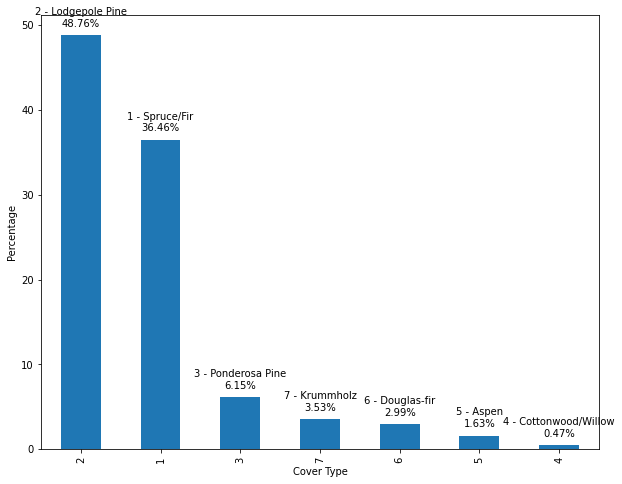

In [59]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df1['Cover_Type_code'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'cover type description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Cover Type')
plt.ylabel('Percentage')

# add percentage labels to the bars
for index, value in enumerate(percentage):
    code = percentage.index[index]
    desc = df1[df1['Cover_Type_code'] == code]['cover type description'].unique()[0]
    plt.text(index, value + 1, f'{code} - {desc}\n{round(value, 2)}%', ha='center')

plt.show()


### Distribution of elevation

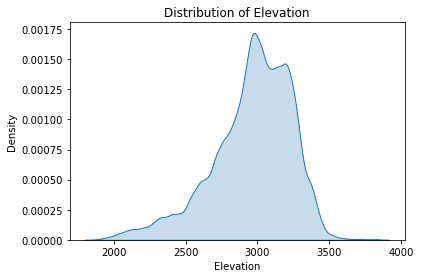

In [63]:
# Create a density plot of the 'elevation' column
sns.kdeplot(df1['Elevation'], shade=True)
plt.xlabel('Elevation')
plt.ylabel('Density')
plt.title('Distribution of Elevation')
plt.show()

<AxesSubplot:xlabel='Cover_Type_code', ylabel='Elevation'>

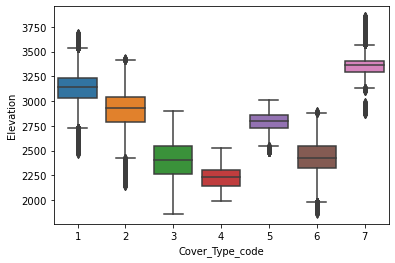

In [60]:

sns.boxplot(x='Cover_Type_code', y='Elevation', data=df1)


From the plot, we can see that Cover_Type_code 1, 2, and 7 have relatively higher median elevations than the other categories. In contrast, Cover_Type_code 3 and 4 have lower median elevations.

### Distribution of Aspect

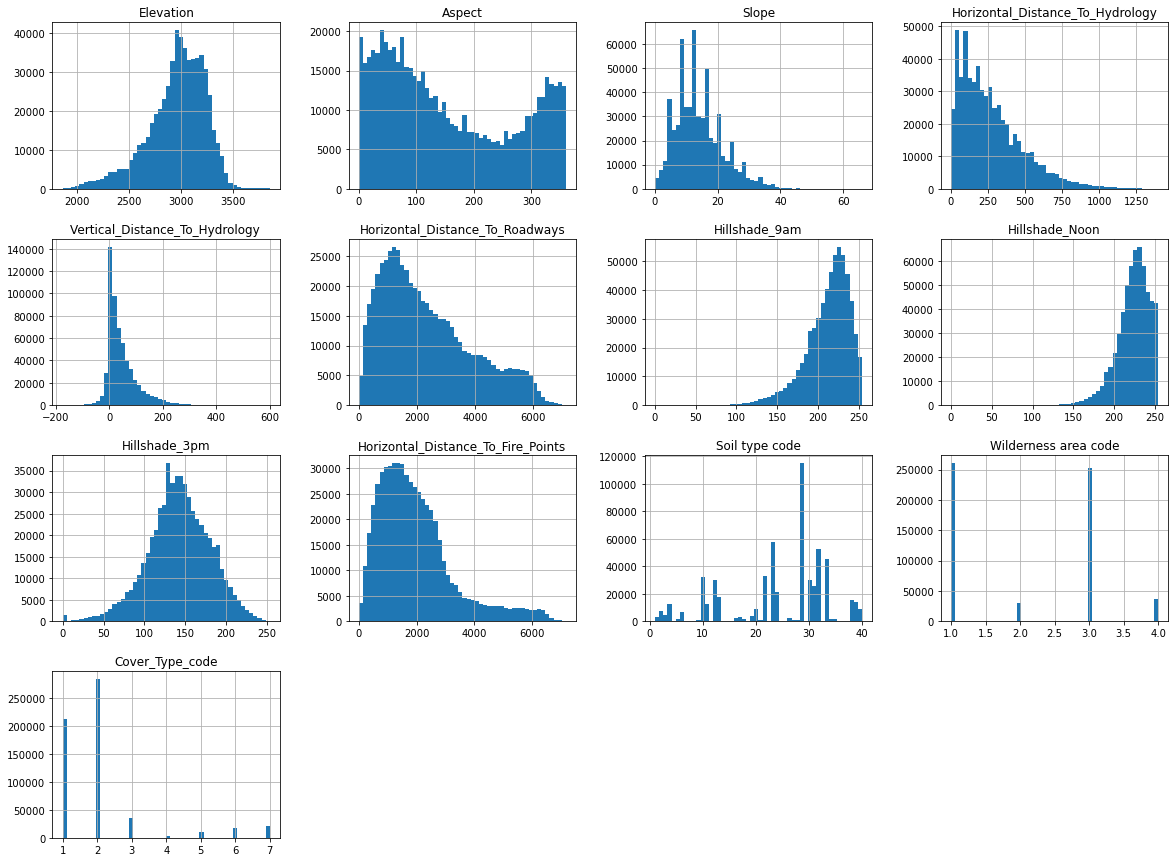

### Distribution of wilderness area

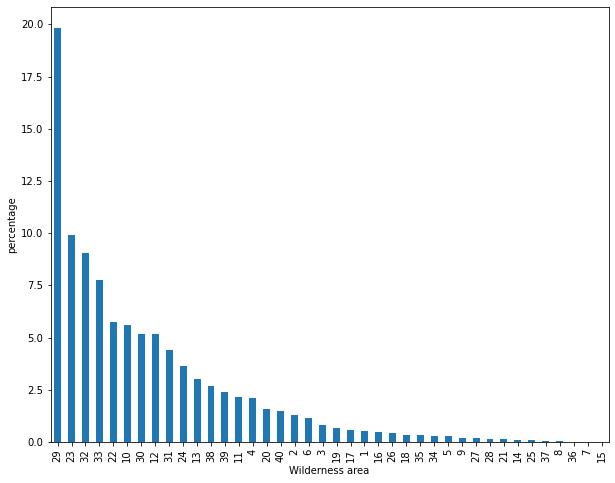

In [25]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df1['Soil type code'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'Wilderness area description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Wilderness area')
plt.ylabel('percentage')

plt.show()

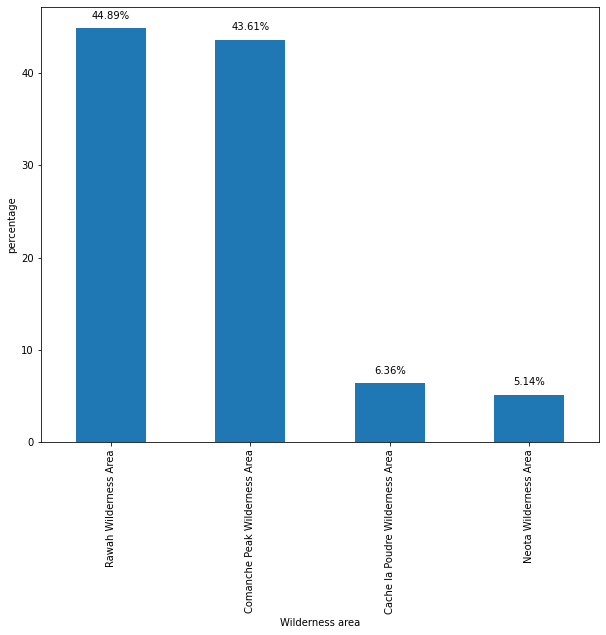

In [26]:
# plot a histogram of the distribution'cover type description' column
plt.figure(figsize=(10, 8))
percentage = df1['Wilderness area description'].value_counts(normalize=True) * 100
# create a bar plot of the percentages of each unique value in the 'Wilderness area description' column
percentage.plot(kind='bar')
# display the plot
plt.xlabel('Wilderness area')
plt.ylabel('percentage')

# add percentage labels to the bars
for index, value in enumerate(percentage):
    plt.text(index, value + 1, str(round(value, 2)) + '%', ha='center')
plt.show()